# GW170817

#### Import needed python modules

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import scipy.signal as sig
from scipy.interpolate import interp1d
from scipy.fftpack import fft, fftfreq,rfft, rfftfreq, irfft
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## DATA

In [2]:
#Opening the file
signal17= np.loadtxt('GW170817_2022.csv')

#checking the shape of the data
signal17.shape

(65536,)

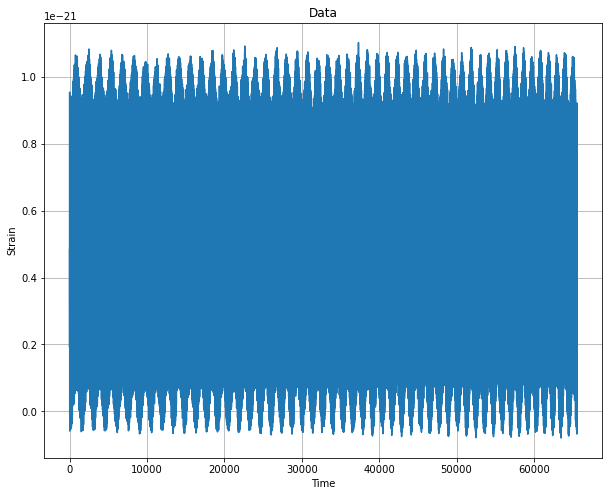

In [3]:
#first plot of the signal

plt.figure(figsize=(10,8))
plt.plot(signal17)
plt.grid('on')
plt.title('Data')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.savefig('S21')

In [4]:
#windowing the data
window_data17=np.blackman(signal17.size)
windowed_data17 = signal17*window_data17

Text(0, 0.5, 'Strain')

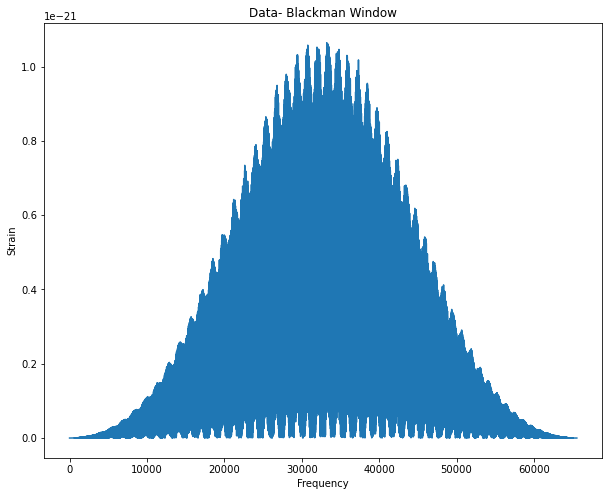

In [5]:
#Data with blackman window
plt.figure(figsize=(10,8))
plt.plot(abs(windowed_data17))
plt.title('Data- Blackman Window')
plt.xlabel('Frequency')
plt.ylabel('Strain')

In [6]:
#performing the FFT of the data
fs_data17= 2* 65536   #minimum number of points according to the sampling theorem
fft_data17= rfft(windowed_data17)/ fs_data17
fft_freq_data17 = rfftfreq(len(window_data17))* fs_data17

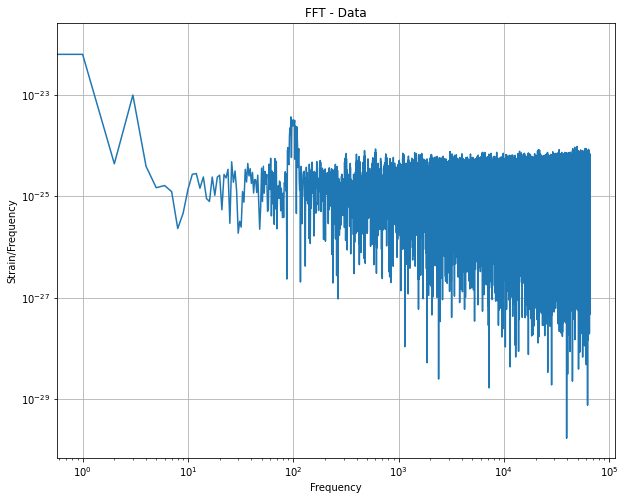

In [7]:
plt.figure(figsize=(10,8))
plt.loglog(abs(fft_data17))
plt.grid('on')
plt.title('FFT - Data')
plt.xlabel('Frequency')
plt.ylabel('Strain/Frequency')
plt.savefig('S22')

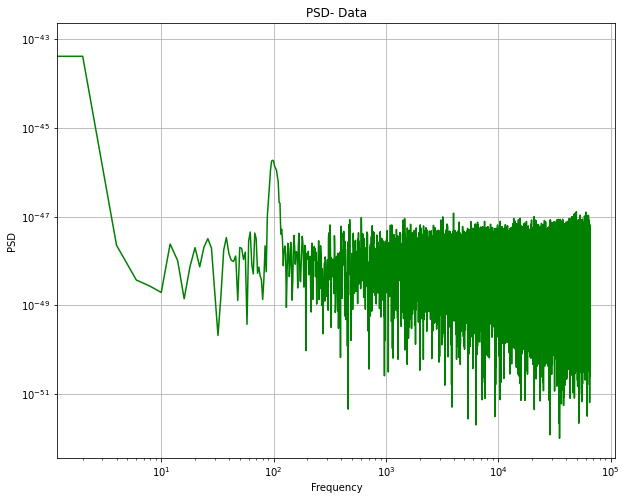

In [8]:
#PSD of the data
psd_data17, freq_psd_data17 = mlab.psd(signal17, NFFT=65536, Fs=fs_data17)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_data17, psd_data17, 'g')
plt.title('PSD- Data')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid('on')
plt.savefig('S23')

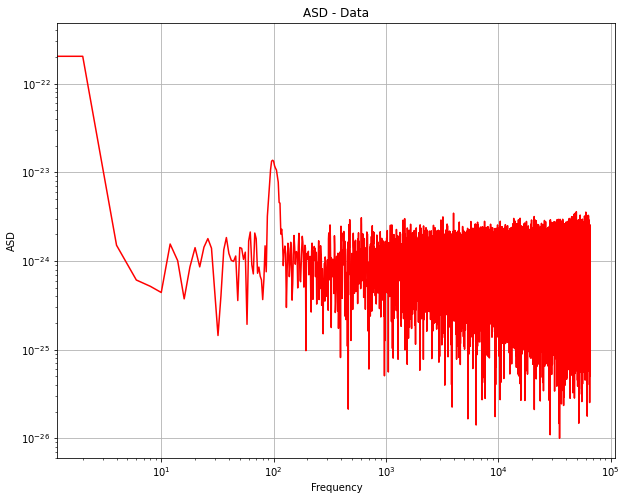

In [9]:
#ASD of the data
asd_data17= np.sqrt(psd_data17)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_data17, asd_data17, 'r')
plt.title('ASD - Data')
plt.xlabel('Frequency')
plt.ylabel('ASD')
plt.grid('on')
plt.savefig('S24')

C:\Users\TATIAN~1\AppData\Local\Temp/ipykernel_35088/3694085000.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=65536) >= signal length (=65536).
  espec_power_data17, espec_freqs_data17, bins, im = plt.specgram(signal17, NFFT=65536, Fs=fs_data17, window= window_data17, cmap= 'inferno')


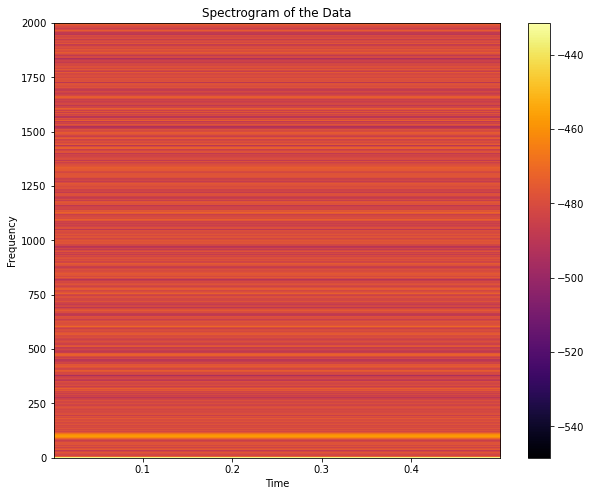

In [10]:
#Spectrogram of the data
plt.figure(figsize=(10,8))
espec_power_data17, espec_freqs_data17, bins, im = plt.specgram(signal17, NFFT=65536, Fs=fs_data17, window= window_data17, cmap= 'inferno')
plt.title('Spectrogram of the Data')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0,2000)
plt.colorbar()
plt.savefig('S25')

## Template

C:\Users\TATIAN~1\AppData\Local\Temp/ipykernel_35088/3233670556.py:65: UserWarning: Only one segment is calculated since parameter NFFT (=65536) >= signal length (=65536).
  espec_power_template, espec_freqs_template, bins, im = plt.specgram(template_strain, NFFT=65536, Fs=fs_template, window= window_template, cmap= 'inferno')


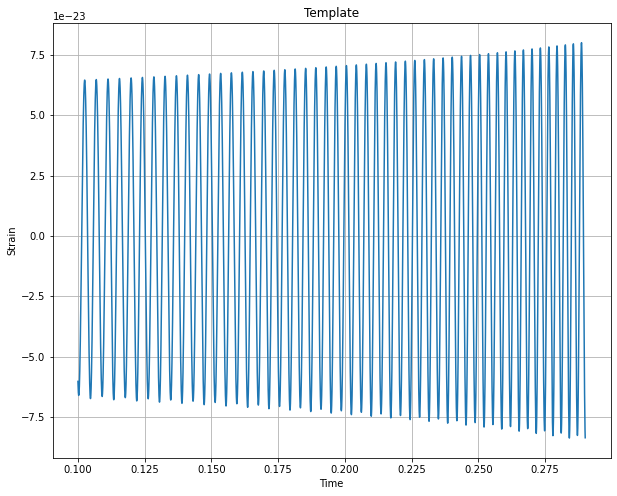

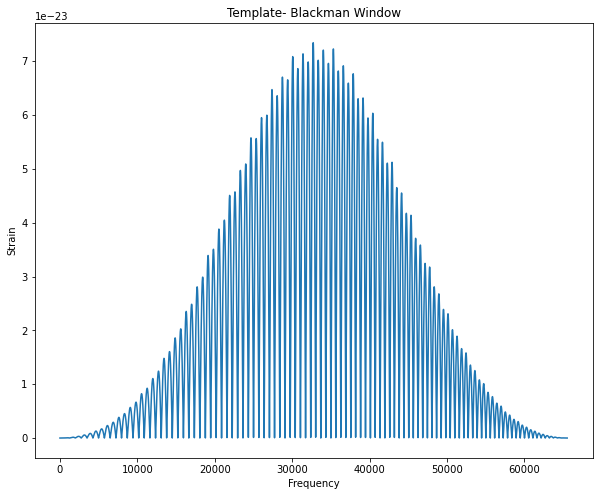

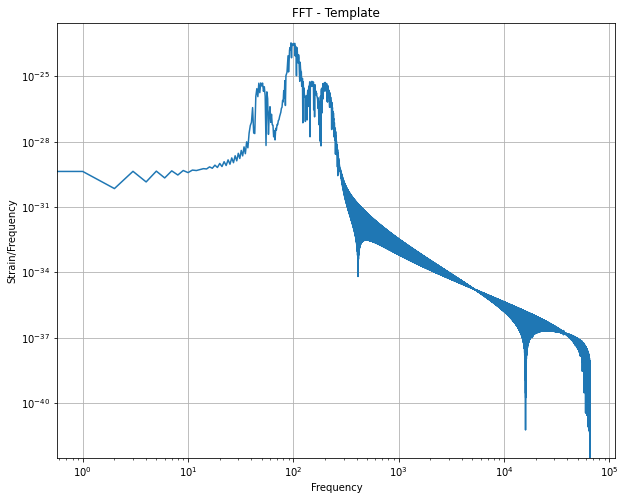

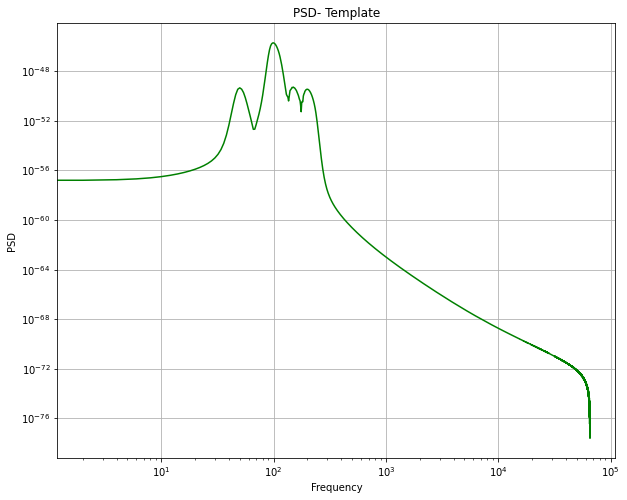

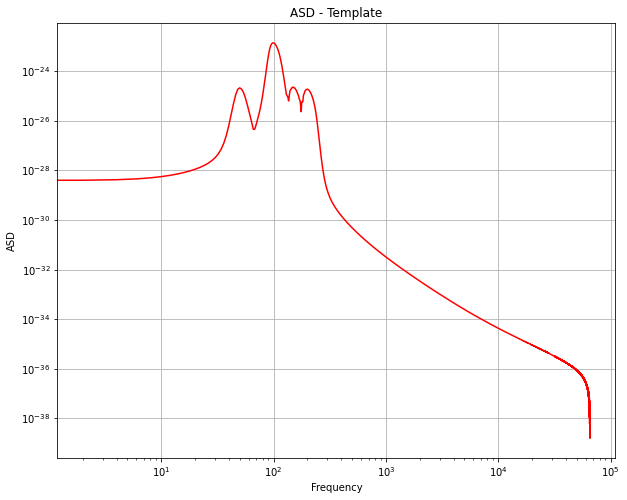

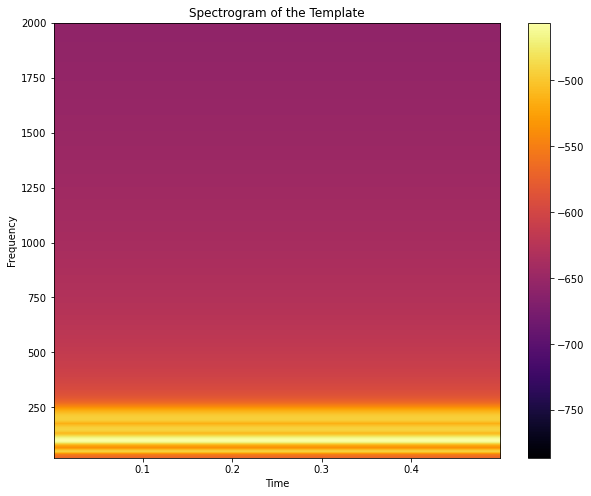

In [11]:
#Opening the file
template= np.loadtxt('GW170817_template_2022.csv')

#Setting some parameters
template_time= template[:,0]
template_strain= template[:,1]

#first plot of the template
plt.figure(figsize=(10,8))
plt.plot(template_time, template_strain)
plt.grid('on')
plt.title('Template')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.savefig('T21')

#windowing the data
window_template=np.blackman(template_strain.size)
windowed_template = template_strain*window_template

#Data with blackman window
plt.figure(figsize=(10,8))
plt.plot(abs(windowed_template))
plt.title('Template- Blackman Window')
plt.xlabel('Frequency')
plt.ylabel('Strain')

#performing the FFT of the data
fs_template= 2* 65536
fft_template= rfft(windowed_template)/ fs_template
fft_freq_template = rfftfreq(len(window_template))* fs_template

plt.figure(figsize=(10,8))
plt.loglog(abs(fft_template))
plt.grid('on')
plt.title('FFT - Template')
plt.xlabel('Frequency')
plt.ylabel('Strain/Frequency')
plt.savefig('T22')

#PSD of the data
psd_template, freq_psd_template = mlab.psd(template_strain, NFFT=65536, Fs=fs_template)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_template, psd_template, 'g')
plt.title('PSD- Template')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid('on')
plt.savefig('T23')

#ASD of the data
asd_template= np.sqrt(psd_template)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_template, asd_template, 'r')
plt.title('ASD - Template')
plt.xlabel('Frequency')
plt.ylabel('ASD')
plt.grid('on')
plt.savefig('T24')

#Spectrogram of the data
plt.figure(figsize=(10,8))
espec_power_template, espec_freqs_template, bins, im = plt.specgram(template_strain, NFFT=65536, Fs=fs_template, window= window_template, cmap= 'inferno')
plt.title('Spectrogram of the Template')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(20,2000)
plt.colorbar()
plt.savefig('T25')



## Signal Analysis

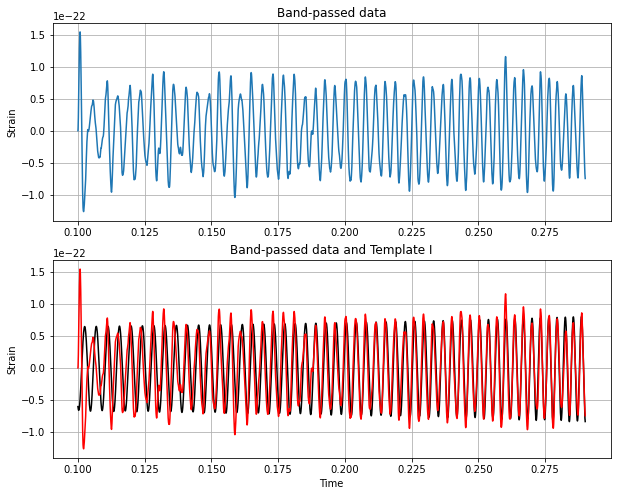

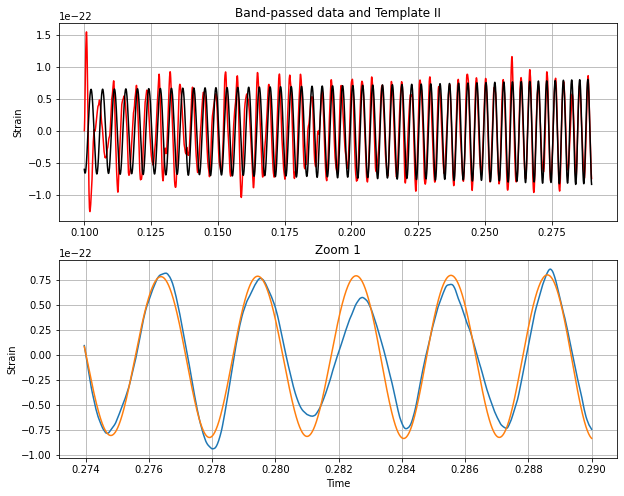

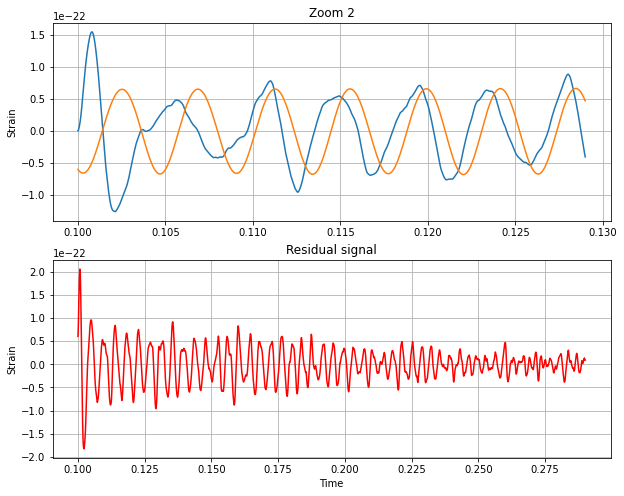

In [17]:
#Bandpass Filter
(B,A) = sig.butter(2, [75.5/(fs_template/2.0), 195/(fs_template/2.0)], btype='pass')     
data_pass= sig.lfilter(B, A, signal17) 

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(template_time, data_pass)
plt.title('Band-passed data')
plt.ylabel('Strain')
plt.grid('on')
plt.savefig('R1')


#Plot the comparison of the filtered signal with the template (template in the background)
plt.subplot(2,1,2)
plt.plot(template_time,template_strain,'k')
plt.plot(template_time,data_pass,'r')
plt.title('Band-passed data and Template I')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.grid('on')
plt.savefig('1')

#Plot the comparison of the filtered signal with the template (template on the front)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(template_time,data_pass,'r')
plt.plot(template_time,template_strain,'k')
plt.title('Band-passed data and Template II')
plt.ylabel('Strain')
plt.grid('on')
plt.savefig('2')

#Zoom of the end of the signal
plt.subplot(2,1,2)
plt.subplot(2,1,2)
plt.plot(template[60000:,0],data_pass[60000:])
plt.plot(template[60000:,0],template[60000:,1])
plt.xlabel('Time')
plt.title('Zoom 1')
plt.ylabel('Strain')
plt.grid('on')
plt.savefig('3')


#Zoom of the beginning of the signal 
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(template[:10000,0],data_pass[:10000])
plt.plot(template[:10000,0],template[:10000,1])
plt.title('Zoom 2')
plt.ylabel('Strain')
plt.grid('on')
plt.savefig('4')


#Residual signal - Extracted noise
plt.subplot(2,1,2)
plt.plot(template_time,data_pass-template_strain,'r')
plt.title('Residual signal')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.grid('on')
plt.savefig('5')


C:\Users\TATIAN~1\AppData\Local\Temp/ipykernel_35088/2389841406.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=65536) >= signal length (=65536).
  espec_power_data17, espec_freqs_data17, bins, im = plt.specgram(data_pass, NFFT=65536, Fs=fs_template, window= windowed_data17,cmap= 'inferno')


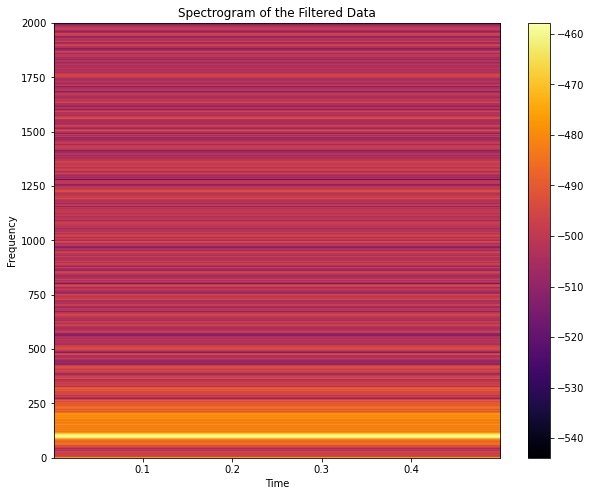

In [18]:
#Spectrogram of the filtered signal
plt.figure(figsize=(10,8))
espec_power_data17, espec_freqs_data17, bins, im = plt.specgram(data_pass, NFFT=65536, Fs=fs_template, window= windowed_data17,cmap= 'inferno')
plt.title('Spectrogram of the Filtered Data')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0,2000)
plt.colorbar()
plt.savefig('R7')
